In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/churn-predictions-personal/Churn_Predictions.csv


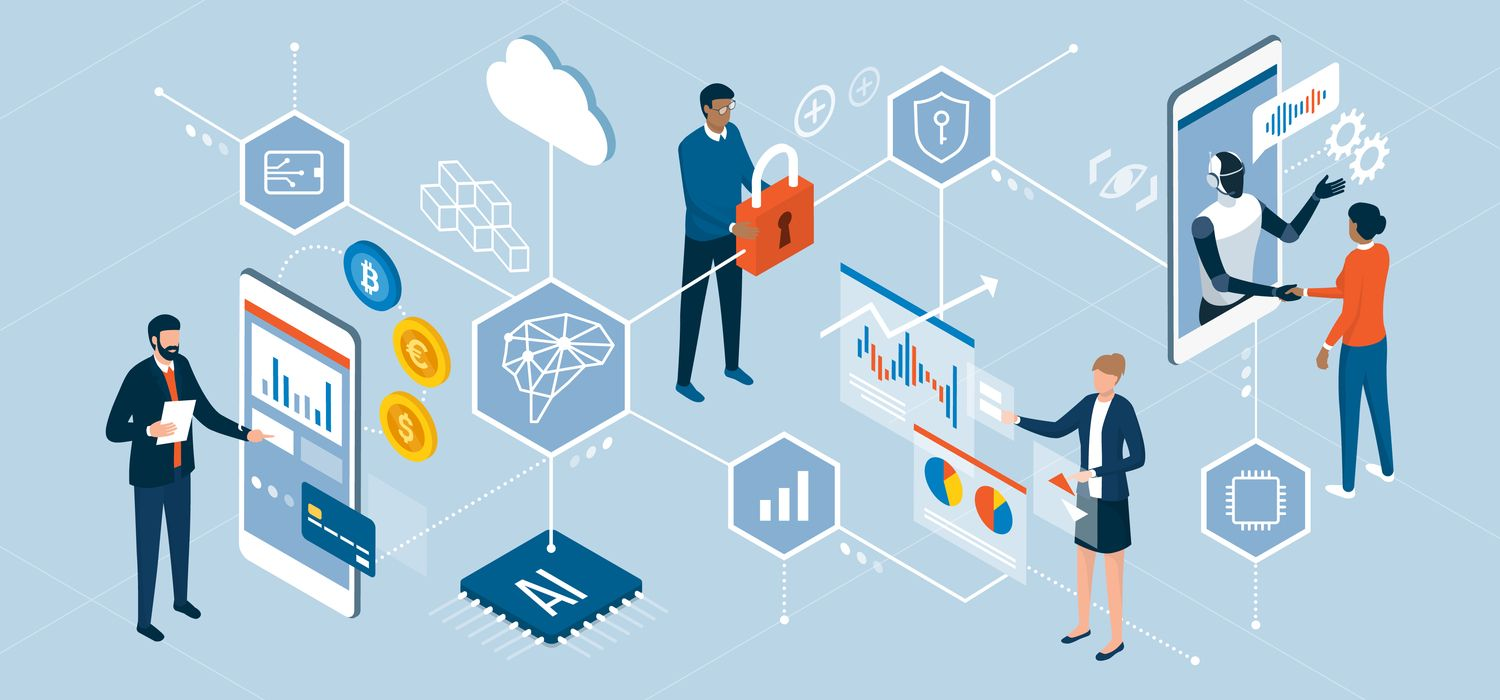

# <div style="color:white;background-color:#1d1545;padding:3%;border-radius:50px 50px;font-size:1em;text-align:center">Bank Customer Churn Prediction using H2O AutoML </div>

> **Skills:【 Data Science, Deep Learning, ANN, Python, AutoML, H20** 】

<div class="alert alert-block alert-info"> 📜 <b>Context</b>: 
<ul>
    <li>In general, churn is expressed as a degree of customer inactivity or disengagement, observed over a given time. </li>
    <li>This manifests within the data in various forms such as the recency of account actions or change in the account balance. </li>
</ul></div>

<div class="alert alert-block alert-info"> 📌 <b>Purpose</b>: We aim to accomplish the following for this study:
<ul>
    <li>Identify and visualize which factors contribute to customer churn. </li>
    <li>Build a prediction model that will perform the following: <ul>
    <li>Classify if a customer is going to churn or not. </li>
    <li>Based on the performance of the model, it is advisable to select a predictive model that can assign a probability value to customer churn.
    <li>This probability estimation will facilitate customer service efforts in efficiently targeting the most easily preventable instances of churn, thereby optimizing their retention strategies.</li>
         </li></ul> 
    </li>
</ul>
    
We will be using ANN models and H2O AutoML in this project.<br><br>
    
🗓️ <b>Project Timeline</b>:     
<div class="alert alert-block alert-success">
    <ul>
        <li>Problem Definition</li>
        <li>Data Preprocessing</li>
        <li>Exploraytory Data Analysis (EDA)</li>
        <li>Feature Engineering</li>
        <li>Model Building and Prediction using ANN</li> 
        <li>Model Building and Prediction using H2O AutoML</li>
    </ul>
</div>

# <div style="font-size:20px;text-align:center;color:black;border-bottom:5px #0026d6 solid;padding-bottom:3%"> PROBLEM DEFINITION </div>

<div class="alert alert-block alert-success"> ☞ In the fiercely competitive banking industry, customer churn poses a significant challenge for financial institutions. Identifying customers who are at risk of churning before they actually leave is crucial for banks to proactively address their concerns and retain their valuable business. To tackle this issue, advanced machine learning techniques, such as H2O AutoML, have emerged as powerful tools for accurate customer churn prediction.<br><br>
    
☞ H2O AutoML is an automated machine learning framework that leverages state-of-the-art algorithms and optimization techniques to efficiently build predictive models. With its ability to handle large datasets and automate the feature engineering and model selection processes, H2O AutoML offers a streamlined approach to churn prediction in the banking domain.<br><br>

☞ By harnessing the power of H2O AutoML, banks can not only identify customers who are likely to churn but also attach probability estimates to these predictions. This probability-based approach enables customer service teams to prioritize their efforts by targeting the low-hanging fruits, i.e., those customers who have a high likelihood of churning and are more likely to respond positively to retention strategies.<br><br>

☞ The integration of H2O AutoML into the churn prediction workflow empowers banks with valuable insights and actionable intelligence. By accurately identifying customers at risk of churning, financial institutions can proactively engage with them, address their concerns, and provide personalized offers or incentives to enhance their loyalty and overall customer experience.<br><br>

☞ In this project, we will delve into the application of H2O AutoML for bank customer churn prediction. By leveraging this advanced machine learning framework, we aim to develop a robust predictive model that not only predicts churn but also quantifies the probability of churn for individual customers. This probability-based approach will enable the bank's customer service team to effectively prioritize their retention efforts and optimize their strategies to minimize customer attrition.<br><br>

☞ Through this project, we hope to demonstrate the effectiveness of H2O AutoML as a valuable tool for customer churn prediction in the banking industry. By leveraging the power of automated machine learning, banks can enhance their customer retention efforts, improve customer satisfaction, and ultimately foster long-term profitability and success.<br><br>
</div>

Note here that because the data was already collected, we can load it and go straight to the data preprocessing stage.

# <div style="font-size:20px;text-align:center;color:black;border-bottom:5px #0026d6 solid;padding-bottom:3%"> DATA PREPROCESSING </div>

First, we upload the basic packages and then we load then dataset form Kaggle data repositories.

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline
import warnings

# Suppressing a warning
warnings.filterwarnings("ignore")

# Read the CSV file into a DataFrame
df = pd.read_csv("/kaggle/input/churn-predictions-personal/Churn_Predictions.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


The given code snippet drops three columns, namely **'CustomerId'**, **'RowNumber'**, and **'Surname'**, from our dataset, because of no interest.

In [3]:
# Drop the columns 'CustomerId', 'RowNumber', and 'Surname' from the DataFrame 'df'
df.drop(['CustomerId', 'RowNumber', 'Surname'], axis='columns', inplace=True)

# Print the first few rows of the modified DataFrame 'df'
df.shape

(10000, 11)

In [4]:
# Display the data types of each column in the DataFrame 'df'
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

Here's a description of each variable in the given DataFrame based on their data types:

<style>
#features {
  font-family: Arial, Helvetica, sans-serif;
  border-collapse: collapse;
  width: 100%;
}

#features td, #features th {
  border: 1px solid #ddd;
  padding: 8px;
}

#features tr:nth-child(even){background-color: #f2f2f2;}

#features tr:hover {background-color: #ddd;}

#features th {
  padding-top: 12px;
  padding-bottom: 12px;
  text-align: left;
  background-color: #CBC3E3;
  color: white;
}
</style>

<table id="features">
  <tr>
    <th>Feature Name</th>
    <th>Type</th>
    <th>Description</th>
  </tr>
  <tr>
    <td>CreditScore</td>
    <td>(int64)</td>  
    <td>Represents the credit score of a customer. Credit scores are numerical values that reflect an individual's creditworthiness.</td>
    <td>&nbsp;</td>
  </tr>
  <tr>
    <td>Geography</td>
    <td>(object)</td>  
    <td>Indicates the geographic location or country of the customer. This variable is represented as an object (string) data type.</td>
    <td>&nbsp;</td>
  </tr>  
  <tr>
    <td>Gender</td>
    <td>(object)</td>  
    <td>Represents the gender of the customer. This variable is also represented as an object (string) data type.</td>
    <td>&nbsp;</td>
  </tr>  
  <tr>
    <td>Age</td>
    <td>(int64)</td>  
    <td>Denotes the age of the customer. It is represented as an integer value.</td>
    <td>&nbsp;</td>
  </tr>  
  <tr>
    <td>Tenure</td>
    <td>(int64)</td>  
    <td>Refers to the number of years a customer has been associated with a particular organization or institution. It is represented as an integer value.</td>
    <td>&nbsp;</td>
  </tr>    
  <tr>
    <td>Balance</td>
    <td>(float64)</td>  
    <td>Represents the account balance of the customer. It is a floating-point number that typically denotes a monetary value.</td>
    <td>&nbsp;</td>
  </tr>
  <tr>
    <td>NumOfProducts</td>
    <td>(int64)</td>  
    <td>Indicates the number of products or services the customer has obtained from the organization. It is represented as an integer value.
    </td>
    <td>&nbsp;</td>
  </tr>  
  <tr>
    <td>HasCrCard</td>
    <td>(int64)</td>  
    <td>Indicates whether the customer has a credit card or not. It is represented as an integer value, where 1 may signify that the customer has a credit card and 0 may indicate the absence of a credit card.</td>
    <td>&nbsp;</td>
  </tr>
  <tr>
    <td>IsActiveMember</td>
    <td>(int64)</td>  
    <td>Indicates whether the customer is an active member or not. It is represented as an integer value, where 1 may signify an active membership and 0 may represent an inactive membership.</td>
    <td>&nbsp;</td>
  </tr>  
  <tr>
    <td>EstimatedSalary</td>
    <td>(float64)</td>  
    <td>Represents the estimated salary of the customer. It is a floating-point number that typically denotes a monetary value.</td>
    <td>&nbsp;</td>
  </tr>
   <tr>
    <td>Exited</td>
    <td>(int64)</td>  
    <td>Indicates whether the customer has exited or churned from the organization. It is represented as an integer value, where 1 may signify that the customer has exited and 0 may represent an active customer.</td>
    <td>&nbsp;</td>
  </tr>  
</table>

In [5]:
# Count the number of unique values in each column of the DataFrame 'df'
df.nunique()

CreditScore         460
Geography             3
Gender                2
Age                  70
Tenure               11
Balance            6382
NumOfProducts         4
HasCrCard             2
IsActiveMember        2
EstimatedSalary    9999
Exited                2
dtype: int64

From this output, 'CreditScore' has 460 unique values, 'Geography' has 3 unique values, 'Gender' has 2 unique values, and so on. The count of unique values provides insights into the variability and distribution of data within each column.

# <div style="font-size:20px;text-align:center;color:black;border-bottom:5px #0026d6 solid;padding-bottom:3%"> EXPLORATORY DATA ANALYSIS </div>

### ➤ Pie Chart
The code generates a **pie chart** that visualizes the proportion of customers who have churned and those who have been retained. The chart provides a visual representation of the data, allowing for a quick understanding of the relative sizes of the two segments.

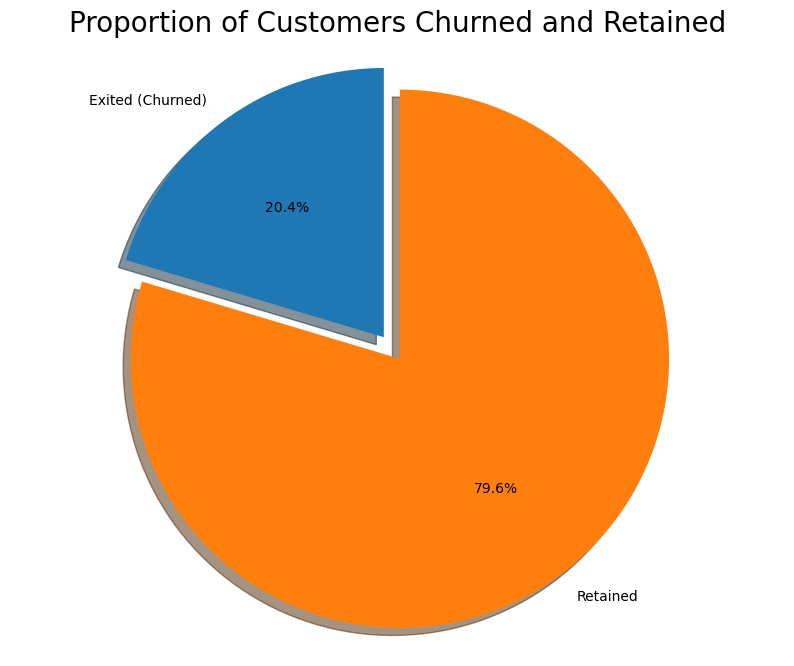

In [6]:
# Define the labels for the pie chart
labels = 'Exited (Churned)', 'Retained'

# Calculate the sizes of each segment in the pie chart
sizes = [df.Exited[df['Exited']==1].count(), df.Exited[df['Exited']==0].count()]

# Set the explode parameter to highlight the 'Retained' segment
explode = (0, 0.1)

# Create a new figure and axis object for the pie chart
fig1, ax1 = plt.subplots(figsize=(10, 8))

# Generate the pie chart with the specified parameters
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)

# Set the aspect ratio of the pie chart to make it a circle
ax1.axis('equal')

# Set the title for the pie chart
plt.title("Proportion of Customers Churned and Retained", size=20)

# Display the pie chart
plt.show()


### ➤ Count Plot

The code generates a grid of countplots to visualize the relationship between categorical variables ('Geography', 'Gender', 'HasCrCard', 'IsActiveMember') and the 'Exited' status. Each countplot provides insights into how the churned and retained customers are distributed across different categories within each variable.

<Axes: xlabel='IsActiveMember', ylabel='count'>

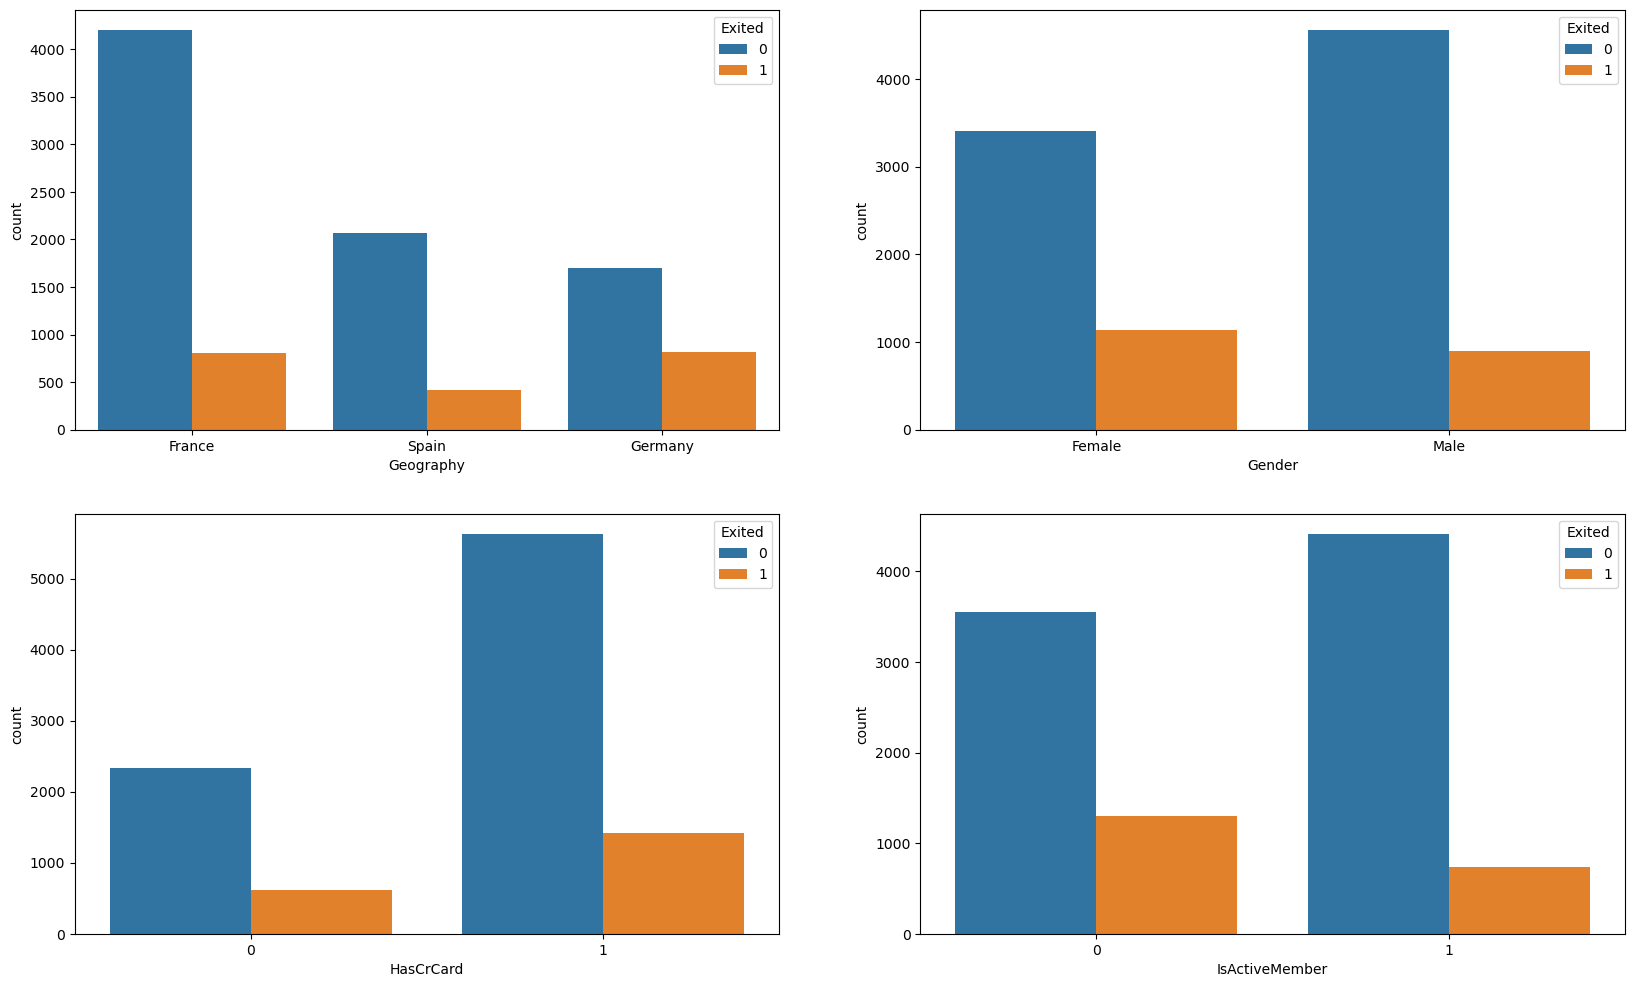

In [7]:
import seaborn as sns

# Create a figure with subplots to display the countplots
fig, axarr = plt.subplots(2, 2, figsize=(20, 12))

# Plot countplot for 'Geography' variable
sns.countplot(x='Geography', hue='Exited', data=df, ax=axarr[0][0])

# Plot countplot for 'Gender' variable
sns.countplot(x='Gender', hue='Exited', data=df, ax=axarr[0][1])

# Plot countplot for 'HasCrCard' variable
sns.countplot(x='HasCrCard', hue='Exited', data=df, ax=axarr[1][0])

# Plot countplot for 'IsActiveMember' variable
sns.countplot(x='IsActiveMember', hue='Exited', data=df, ax=axarr[1][1])

### ➤ Box Plot

The code generates a grid of boxplots to visualize the relationship between continuous data attributes and the 'Exited' status. Each boxplot provides insights into the distribution, central tendency, and variability of the data for churned and retained customers.

<Axes: xlabel='Exited', ylabel='EstimatedSalary'>

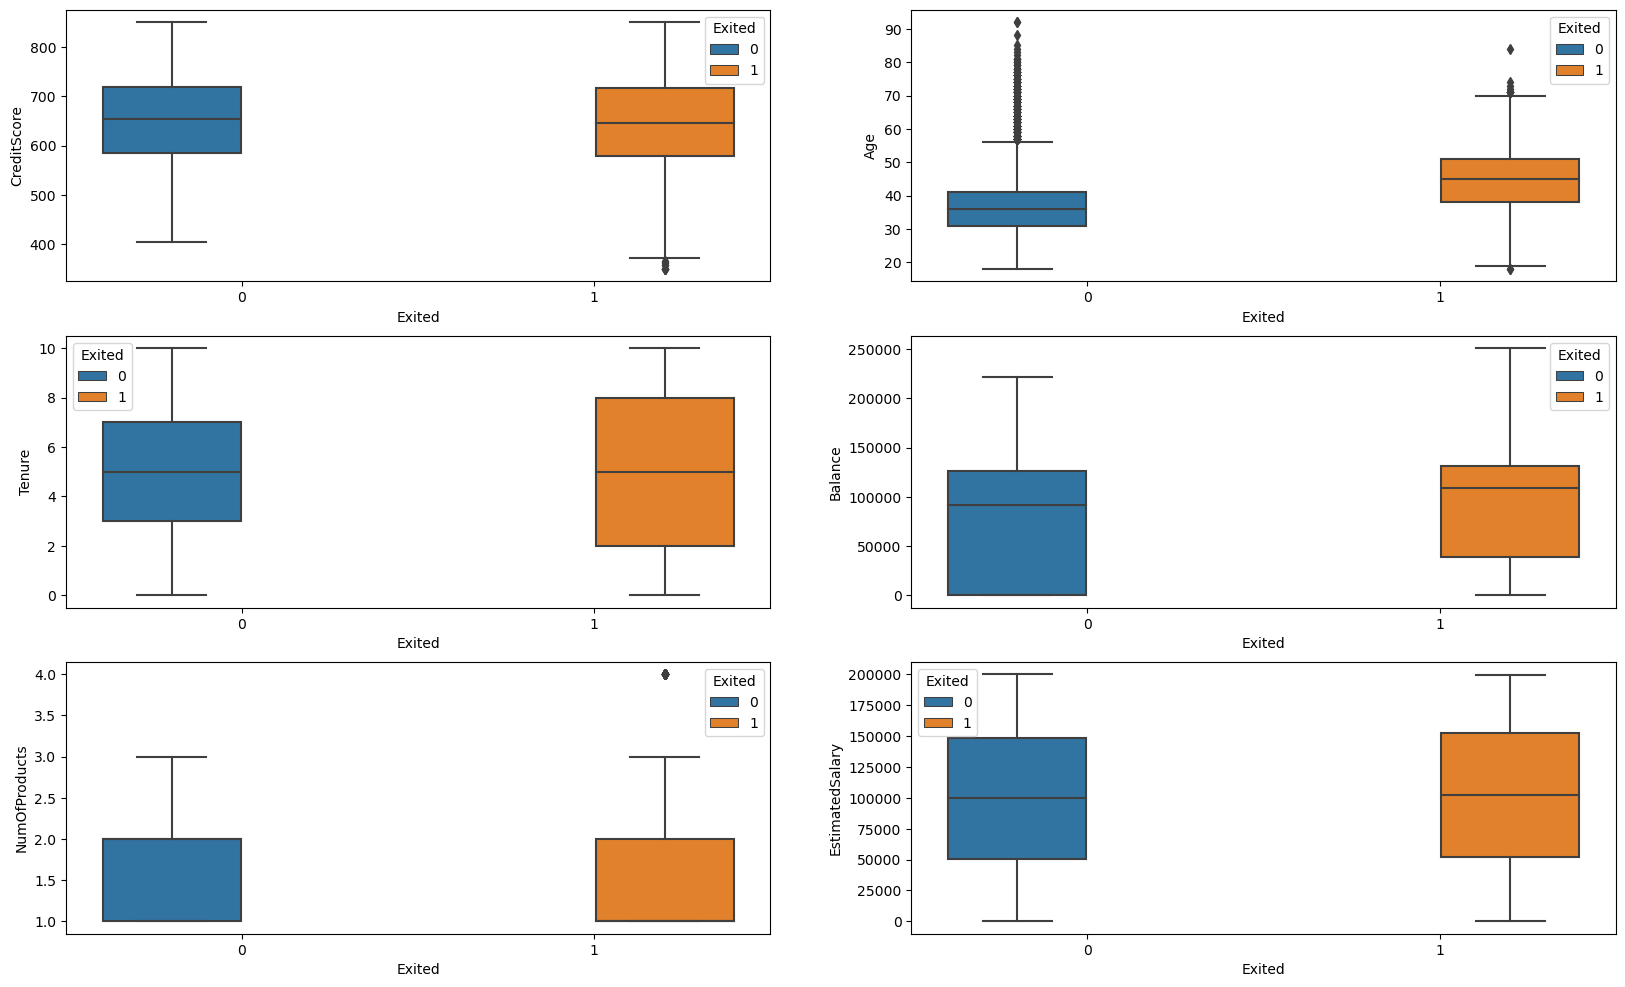

In [8]:
# Create a figure with subplots to display the boxplots
fig, axarr = plt.subplots(3, 2, figsize=(20, 12))

# Plot boxplot for 'CreditScore' variable
sns.boxplot(y='CreditScore', x='Exited', hue='Exited', data=df, ax=axarr[0][0])

# Plot boxplot for 'Age' variable
sns.boxplot(y='Age', x='Exited', hue='Exited', data=df, ax=axarr[0][1])

# Plot boxplot for 'Tenure' variable
sns.boxplot(y='Tenure', x='Exited', hue='Exited', data=df, ax=axarr[1][0])

# Plot boxplot for 'Balance' variable
sns.boxplot(y='Balance', x='Exited', hue='Exited', data=df, ax=axarr[1][1])

# Plot boxplot for 'NumOfProducts' variable
sns.boxplot(y='NumOfProducts', x='Exited', hue='Exited', data=df, ax=axarr[2][0])

# Plot boxplot for 'EstimatedSalary' variable
sns.boxplot(y='EstimatedSalary', x='Exited', hue='Exited', data=df, ax=axarr[2][1])

The code generates a histogram to visualize the distribution of customer tenure for churned and retained customers. The different colors and labels in the histogram provide an easy way to compare the distribution of tenure for customers who churned and those who did not.

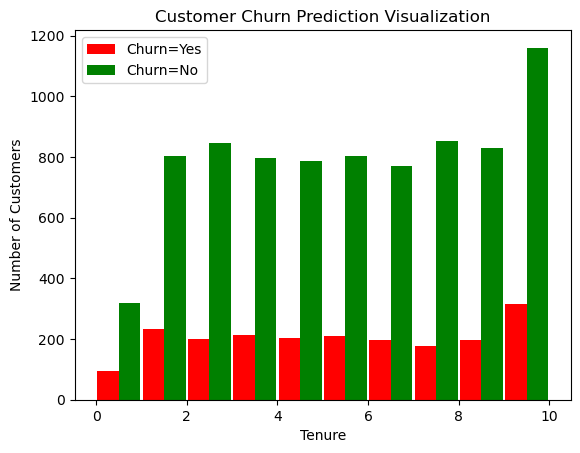

In [9]:
# Extract the 'Tenure' values for churned and retained customers
tenure_churn_no = df[df.Exited==0].Tenure
tenure_churn_yes = df[df.Exited==1].Tenure

# Set the labels for the x-axis, y-axis, and the title of the plot
plt.xlabel("Tenure")
plt.ylabel("Number of Customers")
plt.title("Customer Churn Prediction Visualization")

# Plot the histogram with two datasets: tenure_churn_yes and tenure_churn_no
plt.hist([tenure_churn_yes, tenure_churn_no], rwidth=0.95, color=['red', 'green'], label=['Churn=Yes', 'Churn=No'])

# Display the legend for differentiating churned and retained customers
plt.legend()

# <div style="font-size:20px;text-align:center;color:black;border-bottom:5px #0026d6 solid;padding-bottom:3%"> FEATURE ENGINEERING </div>

The code generates two boxplots to visualize the relationships between the derived ratios (**'BalanceSalaryRatio'** and **'TenureByAge'**) and the churn status. The boxplots provide insights into the distribution, central tendency, and variability of these ratios for churned and retained customers. The **plt.ylim()** functions are used to adjust the y-axis limits for better visualization.

### ➤ BalanceSalaryRatio

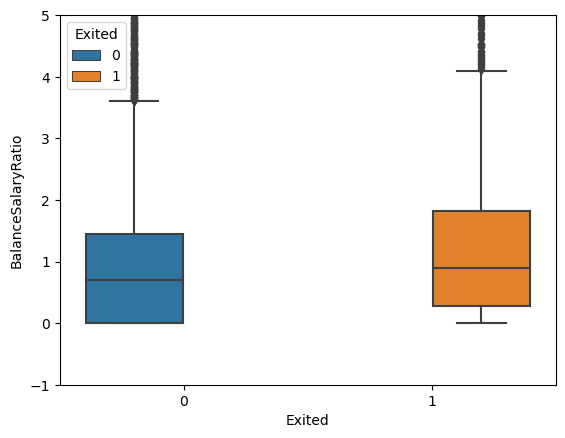

In [10]:
# Calculate the balance to salary ratio and add it as a new column
df['BalanceSalaryRatio'] = df.Balance / df.EstimatedSalary

# Create a boxplot to visualize the relationship between the balance to salary ratio and churn status
sns.boxplot(y='BalanceSalaryRatio', x='Exited', hue='Exited', data=df)
plt.ylim(-1, 5)  # Set the y-axis limits for better visualization

# Display the boxplot
plt.show()

### ➤ TenureByAge

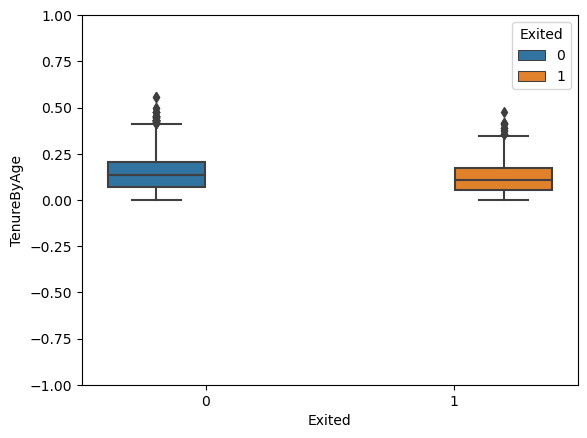

In [11]:
# Calculate the tenure by age ratio and add it as a new column
df['TenureByAge'] = df.Tenure / df.Age

# Create a boxplot to visualize the relationship between the tenure by age ratio and churn status
sns.boxplot(y='TenureByAge', x='Exited', hue='Exited', data=df)
plt.ylim(-1, 1)  # Set the y-axis limits for better visualization

# Display the boxplot
plt.show()

### ➤ Printing the categorical variables

The function print_unique_col_values can be called with a DataFrame as an argument, and it will iterate over each column in the DataFrame. If a column has an object data type, it will print the column name and its unique values. This function helps to quickly understand the unique values present in categorical or object-type columns of a DataFrame.

In [12]:
def print_unique_col_values(df):
    # Iterate over each column in the DataFrame
    for column in df:
        # Check if the column data type is 'object'
        if df[column].dtypes == 'object':
        # Print the column name and its unique values
            print(f'{column}: {df[column].unique()}')
            
print_unique_col_values(df)            

Geography: ['France' 'Spain' 'Germany']
Gender: ['Female' 'Male']


### ➤ Label Encoding

The code snippet below transforms categorical variables ('Gender' and 'Geography') into numeric representations or one-hot encoded dummy variables. These transformations are commonly performed as part of the feature enginnering to prepare the data for further analysis, modeling, or machine learning tasks.

In [13]:
# Replace the values in the 'Gender' column with numeric values
df['Gender'].replace({'Male': 1, 'Female': 0}, inplace=True)

# Create dummy variables for the 'Geography' column and store the modified DataFrame in 'df1'
df1 = pd.get_dummies(data=df, columns=['Geography'])

# Print the first few rows of the modified DataFrame 'df1'
df1.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,BalanceSalaryRatio,TenureByAge,Geography_France,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,0.000000,0.047619,1,0,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0.744677,0.024390,0,0,1
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1.401375,0.190476,1,0,0
3,699,0,39,1,0.00,2,0,0,93826.63,0,0.000000,0.025641,1,0,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,1.587055,0.046512,0,0,1


The purpose of this code snippet is to scale the selected variables in the DataFrame 'df1' using the **MinMaxScaler**. 

Scaling the variables ensures that they are on a similar scale, which can be beneficial for certain machine learning algorithms that rely on the relative magnitudes of the features. Scaling also helps to prevent certain features from dominating the model simply because they have larger values compared to other features.

In [14]:
# Define the list of variables to be scaled
scale_var = ['Tenure', 'CreditScore', 'Age', 'Balance', 'NumOfProducts', 'EstimatedSalary']

# Import the MinMaxScaler from sklearn.preprocessing
from sklearn.preprocessing import MinMaxScaler

# Create an instance of the MinMaxScaler
scaler = MinMaxScaler()

# Apply the MinMaxScaler to the selected variables in the DataFrame 'df1'
df1[scale_var] = scaler.fit_transform(df1[scale_var])

# Print the first few rows of the modified DataFrame 'df1'
df1.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,BalanceSalaryRatio,TenureByAge,Geography_France,Geography_Germany,Geography_Spain
0,0.538,0,0.324324,0.2,0.000000,0.000000,1,1,0.506735,1,0.000000,0.047619,1,0,0
1,0.516,0,0.310811,0.1,0.334031,0.000000,0,1,0.562709,0,0.744677,0.024390,0,0,1
2,0.304,0,0.324324,0.8,0.636357,0.666667,1,0,0.569654,1,1.401375,0.190476,1,0,0
3,0.698,0,0.283784,0.1,0.000000,0.333333,0,0,0.469120,0,0.000000,0.025641,1,0,0
4,1.000,0,0.337838,0.2,0.500246,0.000000,1,1,0.395400,0,1.587055,0.046512,0,0,1


In [15]:
# Separate the independent features (X) and the dependent feature (y)
X = df1.drop('Exited', axis='columns')  # Independent features
y = df1['Exited']  # Dependent feature

# Import the train_test_split function from sklearn.model_selection
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

# Print the number of columns in the X_train DataFrame
len(X_train.columns)

14

The purpose of this code snippet is to split the data into training and testing sets, where **X_train** contains the independent features for training, **X_test** contains the independent features for testing, **y_train** contains the dependent feature for training, and **y_test** contains the dependent feature for testing. 

The last line prints the count of independent features in the training set.

# <div style="font-size:20px;text-align:center;color:black;border-bottom:5px #0026d6 solid;padding-bottom:3%"> MODEL BUILDING AND PREDICTION </div>

<div class="alert alert-block alert-success"> 📜 <b>Model Description</b>: <br><br>
    
A **Sequential model** in Keras is suitable for creating a straightforward stack of layers, where each layer has a single input tensor and produces a single output tensor. It provides a simple way to build neural networks by adding layers in a sequential manner.<br><br>

However, a Sequential model is not the appropriate choice in certain scenarios:

⇥ Multiple Inputs or Outputs: If your model requires multiple input tensors or produces multiple output tensors, a Sequential model is not suitable. For example, if you have a model that takes both images and text as inputs or produces multiple predictions simultaneously, you would need to use a different type of model.<br><br>
    
⇥ Layers with Multiple Inputs or Outputs: If any of the layers in your model have multiple inputs or outputs, a Sequential model cannot handle it. Certain complex models may have layers that receive input from multiple sources or generate multiple outputs, such as shared layers or branches in the network. In such cases, a Sequential model is limited in its ability to handle these scenarios.<br><br>
    
⇥ Layer Sharing: If you need to share layers across different parts of your model, such as using the same layer for feature extraction in multiple branches, a Sequential model is not capable of implementing this. Layer sharing allows the model to learn and reuse common patterns or representations across different parts of the network.<br><br>
    
⇥ Non-Linear Topology: If you require a non-linear topology in your model, such as residual connections (skip connections) or multi-branch architectures, a Sequential model is not the appropriate choice. These advanced topologies involve more complex connections and require a more flexible model definition than what a Sequential model can provide.<br><br>
    
In summary, while a Sequential model is great for building simple, sequential neural networks, it has limitations when dealing with multiple inputs or outputs, layers with multiple inputs or outputs, layer sharing, or non-linear topologies. In such cases, other types of models, like functional or subclassing models in Keras, provide the flexibility and capabilities to address these complex requirements.<br><br>
</div>

The code snippet demonstrates how to build a neural network model using the Sequential API in Keras. The model is compiled with appropriate settings, and then trained on the training data using the **fit()** function.

In [16]:
import tensorflow as tf
from tensorflow import keras

# Define the model architecture using a Sequential model
model = keras.Sequential([
    keras.layers.Dense(12, input_shape=(14,), activation='relu'),  # First hidden layer with 12 units and ReLU activation
    keras.layers.Dense(6, activation='relu'),  # Second hidden layer with 6 units and ReLU activation
    keras.layers.Dense(1, activation='sigmoid')  # Output layer with 1 unit and sigmoid activation
])

# Compile the model with specified optimizer, loss function, and metrics
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model on the training data
model.fit(X_train, y_train, epochs=100)  # 100 epochs for training

Epoch 1/100
250/250 [==============================] - 6s 3ms/step - loss: 0.5434 - accuracy: 0.7931
Epoch 2/100
250/250 [==============================] - 1s 3ms/step - loss: 0.4777 - accuracy: 0.7954
Epoch 3/100
250/250 [==============================] - 1s 3ms/step - loss: 0.4598 - accuracy: 0.7974
Epoch 4/100
250/250 [==============================] - 1s 3ms/step - loss: 0.4569 - accuracy: 0.8020
Epoch 5/100
250/250 [==============================] - 1s 3ms/step - loss: 0.4412 - accuracy: 0.8101
Epoch 6/100
250/250 [==============================] - 1s 3ms/step - loss: 0.4326 - accuracy: 0.8127
Epoch 7/100
250/250 [==============================] - 1s 3ms/step - loss: 0.4261 - accuracy: 0.8179
Epoch 8/100
250/250 [==============================] - 1s 3ms/step - loss: 0.4250 - accuracy: 0.8174
Epoch 9/100
250/250 [==============================] - 1s 3ms/step - loss: 0.4189 - accuracy: 0.8215
Epoch 10/100
250/250 [==============================] - 1s 3ms/step - loss: 0.4156 - accura

In [17]:
# Evaluate the model on the test data
evaluation = model.evaluate(X_test, y_test)

# Print the evaluation results
print("Test Loss:", evaluation[0])  # Test loss value
print("Test Accuracy:", evaluation[1])  # Test accuracy value

63/63 [==============================] - 0s 3ms/step - loss: 0.3600 - accuracy: 0.8570
Test Loss: 0.35995036363601685
Test Accuracy: 0.8569999933242798


In [18]:
# Predict the output for the test data
yp = model.predict(X_test)

# Print the predicted values
print(yp)

63/63 [==============================] - 0s 2ms/step
[[0.03037128]
 [0.11410711]
 [0.07260708]
 ...
 [0.01183906]
 [0.00797668]
 [0.07222683]]


You can further analyze and use the predicted values **yp** for various purposes, such as calculating performance metrics, generating visualizations, or making decisions based on the model's predictions.

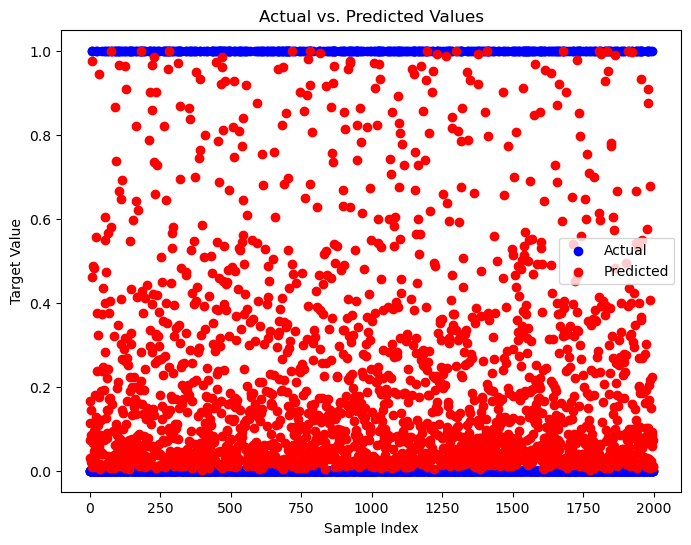

In [19]:
# Generate a visualization of predicted values vs. actual values
plt.figure(figsize=(8, 6))
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual')
plt.scatter(range(len(yp)), yp, color='red', label='Predicted')
plt.xlabel('Sample Index')
plt.ylabel('Target Value')
plt.title('Actual vs. Predicted Values')
plt.legend()
plt.show()

### ➤ Converting our predictions to 0,1 to check accuracy

By assigning binary labels based on a threshold value (**0.5 in this case**), the code snippet converts the predicted values into discrete predictions, which can be further used for performance evaluation and comparison with the actual target values.

In [20]:
y_pred = []  # Create an empty list to store the predicted binary labels

for element in yp:
    if element > 0.5:
        y_pred.append(1)  # If the predicted value is greater than 0.5, assign 1 (Positive class)
    else:
        y_pred.append(0)  # If the predicted value is less than or equal to 0.5, assign 0 (Negative class)

In [21]:
from sklearn.metrics import classification_report

# Generate the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.95      0.91      1595
           1       0.73      0.47      0.57       405

    accuracy                           0.86      2000
   macro avg       0.80      0.71      0.74      2000
weighted avg       0.85      0.86      0.84      2000



### ➤ Confusion Matrix

Text(95.72222222222221, 0.5, 'Truth')

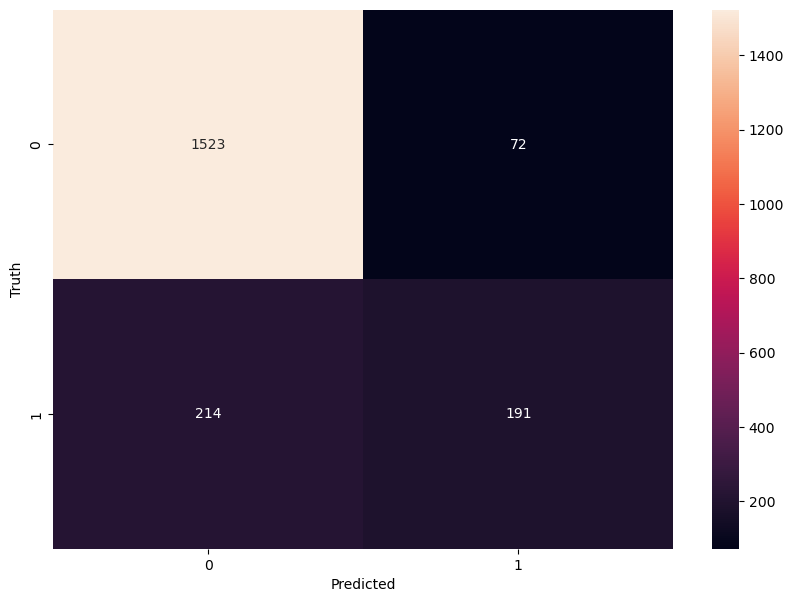

In [22]:
import seaborn as sn

# Calculate the confusion matrix
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_pred)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(10, 7))
sn.heatmap(cm, annot=True, fmt='d')  # 'annot=True' displays the count values in each cell, 'fmt='d'' formats the values as integers
plt.xlabel('Predicted')
plt.ylabel('Truth')

The resulting heatmap visualization provides a visual representation of the **confusion matrix**, allowing us to easily interpret the distribution of predicted and actual labels.

### ➤ Accuracy Score

In [23]:
from sklearn.metrics import accuracy_score

# Calculate and print the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy score is:", accuracy * 100, "%")

Accuracy score is: 85.7 %


<div class="alert alert-block alert-success"> ✅ <b>Conclusion</b>: <br><br>
 
☞ The accuracy score of **85.0%** indicates that the model correctly classified 85.0% of the samples in the test dataset. It demonstrates the proportion of accurate predictions compared to the total number of samples.<br><br>

☞ An accuracy score of 85.0% suggests that the model is performing reasonably well in terms of overall accuracy. However, it is important to consider other evaluation metrics and the specific requirements of the problem domain to obtain a comprehensive understanding of the model's performance.<br><br>

☞ Remember that accuracy is just one metric, and depending on the nature of the problem, other metrics such as precision, recall, and F1-score may provide additional insights. Evaluating multiple metrics can help you gain a more comprehensive understanding of the model's strengths and weaknesses in different aspects of classification performance.<br><br>
</div>

# <div style="font-size:20px;text-align:center;color:black;border-bottom:5px #0026d6 solid;padding-bottom:3%"> MODEL BUILDING AND PREDICTION USING H20 AUTOML </div>

### ➤ Introduction

**H2O** is a powerful and scalable open-source machine learning platform that provides a wide range of algorithms and tools for data analysis and modeling. It offers a distributed computing framework that enables efficient processing of large datasets by leveraging in-memory computing.

Some key features of H2O include:

- **Algorithms**: H2O supports various machine learning algorithms, such as gradient boosted machines (GBM), generalized linear models (GLM), random forests, deep learning, k-means clustering, and more. This allows users to apply a diverse set of algorithms for different types of data and modeling tasks.

- **Scalability**: H2O is designed to handle large-scale datasets and can be deployed on distributed systems, allowing users to take advantage of parallel processing and leverage multiple nodes to train models and process data in a scalable manner.

- **Ease of Use**: H2O provides user-friendly interfaces and APIs in popular programming languages like Python, R, and Java, making it accessible to data scientists and analysts. It also offers a web-based graphical interface called H2O Flow, which allows users to build, deploy, and visualize models without writing code.

- **Model Interpretability**: H2O provides tools to interpret and understand the models created using its algorithms. It offers feature importance analysis, partial dependence plots, and other techniques to gain insights into how models make predictions.

- **Integration**: H2O can seamlessly integrate with other popular data science tools and frameworks, such as Python's scikit-learn, R's caret, and Apache Spark, enabling users to leverage H2O's capabilities alongside their existing workflows.

Overall, H2O is a versatile and powerful platform that empowers users to perform scalable and efficient machine learning tasks, making it a popular choice for data scientists and analysts working with large datasets.

### ➤ Installing H2O AutoML

In [24]:
!pip install requests
!pip install tabulate
!pip install "colorama>=0.3.8"
!pip install future

In [25]:
!pip install h2o

### ➤ Importing the h2o Python module and H2OAutoML class

In [26]:
import h2o
from h2o.automl import H2OAutoML
h2o.init(max_mem_size='16G')  ##  the h2o.init() makes sure that no prior instance of H2O is running.

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.19" 2023-04-18; OpenJDK Runtime Environment (build 11.0.19+7-post-Ubuntu-0ubuntu122.04.1); OpenJDK 64-Bit Server VM (build 11.0.19+7-post-Ubuntu-0ubuntu122.04.1, mixed mode, sharing)
  Starting server from /opt/conda/lib/python3.10/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmp4fxe4o_c
  JVM stdout: /tmp/tmp4fxe4o_c/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmp4fxe4o_c/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,03 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.40.0.4
H2O_cluster_version_age:,2 months and 12 days
H2O_cluster_name:,H2O_from_python_unknownUser_wkni9y
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,16 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


### ➤ Loading the dataset

In [27]:
# Read the CSV file into a DataFrame
df = pd.read_csv("/kaggle/input/churn-predictions-personal/Churn_Predictions.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


**H2O** AutoML can do all the data preprocessing techniques.

### ➤ Splitting the dataset

In [28]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df, test_size=0.2, random_state=42)
df_train.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9254,9255,15601116,P'an,686,France,Male,32,6,0.00,2,1,1,179093.26,0
1561,1562,15766374,Leak,632,Germany,Male,42,4,119624.60,2,1,1,195978.86,0
1670,1671,15716994,Green,559,Spain,Male,24,3,114739.92,1,1,0,85891.02,1
6087,6088,15730759,Chukwudi,561,France,Female,27,9,135637.00,1,1,0,153080.40,1
6669,6670,15797900,Chinomso,517,France,Male,56,9,142147.32,1,0,0,39488.04,1


By splitting the DataFrame into training and testing sets, we can use **df_train** to train your machine learning models and **df_test** to evaluate the model's performance on unseen data. It is a common practice in machine learning to separate data into training and testing sets to assess the model's generalization capabilities.

### ➤ Removing irrelevant features from the dataset

In [29]:
y = "Exited"  # Dependent variable
x = list(df.columns)  # Independent variables (converted to a list)

x.remove(y)  # Remove the dependent variable from the list of independent variables
x.remove('CustomerId')  # Remove 'CustomerId' from the list of independent variables
x.remove('RowNumber')  # Remove 'RowNumber' from the list of independent variables
x.remove('Surname')  # Remove 'Surname' from the list of independent variables

By removing the dependent variable and the specified columns from the list of independent variables, we can focus on the remaining variables for analysis or building predictive models.

### ➤ Model Fitting and Leaderboard

In [30]:
# Convert pandas DataFrames to H2O frames
df_train_h2o = h2o.H2OFrame(df_train)
df_test_h2o = h2o.H2OFrame(df_test)

x = list(df_train.columns)
y = "Exited"

x.remove(y)  # Remove the dependent variable from the list of independent variables
x.remove("CustomerId")  # Remove 'CustomerId' from the list of independent variables
x.remove("RowNumber")  # Remove 'RowNumber' from the list of independent variables
x.remove("Surname")  # Remove 'Surname' from the list of independent variables

aml = H2OAutoML(max_runtime_secs=300, max_models=10, seed=10, verbosity="info", nfolds=2)
aml.train(x=x, y=y, training_frame=df_train_h2o)

lb = aml.leaderboard
lb.head()

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
10:13:04.958: Project: AutoML_1_20230711_101304
10:13:04.963: Setting stopping tolerance adaptively based on the training frame: 0.011180339887498949
10:13:04.964: Build control seed: 10
10:13:04.968: training frame: Frame key: AutoML_1_20230711_101304_training_Key_Frame__upload_a15bfd469ab1cd6ab892dc87d24b42e4.hex    cols: 14    rows: 8000  chunks: 1    size: 386162  checksum: 2332872589914732730
10:13:04.968: validation frame: NULL
10:13:04.969: leaderboard frame: NULL
10:13:04.969: blending frame: NULL
10:13:04.969: response column: Exited
10:13:04.969: fold column: null
10:13:04.969: weights column: null
10:13:05.7: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), grid_1 (4g, 90w), lr_search (7g, 30w)]}, {GLM : [def_1 (1g, 10w)]}, {DRF :

model_id,rmse,mse,mae,rmsle,mean_residual_deviance
StackedEnsemble_AllModels_1_AutoML_1_20230711_101304,0.323971,0.104957,0.213902,0.227839,0.104957
StackedEnsemble_BestOfFamily_1_AutoML_1_20230711_101304,0.324812,0.105503,0.215768,0.228591,0.105503
GBM_1_AutoML_1_20230711_101304,0.325485,0.10594,0.218085,0.228708,0.10594
GBM_2_AutoML_1_20230711_101304,0.325719,0.106093,0.213217,0.228659,0.106093
GBM_3_AutoML_1_20230711_101304,0.327959,0.107557,0.215381,0.230464,0.107557
GBM_4_AutoML_1_20230711_101304,0.330253,0.109067,0.219525,0.232276,0.109067
DRF_1_AutoML_1_20230711_101304,0.331015,0.109571,0.218361,0.234329,0.109571
XGBoost_3_AutoML_1_20230711_101304,0.334986,0.112215,0.223735,0.237483,0.112215
XRT_1_AutoML_1_20230711_101304,0.343832,0.11822,0.25766,0.246095,0.11822
XGBoost_1_AutoML_1_20230711_101304,0.360954,0.130288,0.25152,0.262528,0.130288


The **leaderboard** provides an overview of the models trained by H2OAutoML, allowing you to compare their performance and select the best-performing model for further analysis or prediction tasks.

### ➤ Getting all the model ids

In [31]:
model_ids = list(aml.leaderboard['model_id'].as_data_frame().iloc[:, 0])
model_ids

['StackedEnsemble_AllModels_1_AutoML_1_20230711_101304',
 'StackedEnsemble_BestOfFamily_1_AutoML_1_20230711_101304',
 'GBM_1_AutoML_1_20230711_101304',
 'GBM_2_AutoML_1_20230711_101304',
 'GBM_3_AutoML_1_20230711_101304',
 'GBM_4_AutoML_1_20230711_101304',
 'DRF_1_AutoML_1_20230711_101304',
 'XGBoost_3_AutoML_1_20230711_101304',
 'XRT_1_AutoML_1_20230711_101304',
 'XGBoost_1_AutoML_1_20230711_101304',
 'XGBoost_2_AutoML_1_20230711_101304',
 'GLM_1_AutoML_1_20230711_101304']

**model_ids** is created as a list containing the model IDs from the leaderboard. This is achieved by accessing the 'model_id' column of the leaderboard and converting it to a pandas DataFrame using **as_data_frame()**. Then, the first column is extracted using **iloc[:, 0]**, and the resulting IDs are converted to a list using **list()**.

After retrieving the model IDs, we can evaluate the performance of the leader model on the test dataset using the following code:

In [32]:
df_test_h2o = h2o.H2OFrame(df_test)  # Convert df_test to H2OFrame

aml.leader.model_performance(df_test_h2o)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


ModelMetricsRegressionGLM: stackedensemble
** Reported on test data. **

MSE: 0.09825033594364885
RMSE: 0.3134490962559134
MAE: 0.20642594129142813
RMSLE: 0.2212112291607927
Mean Residual Deviance: 0.09825033594364885
R^2: 0.37772033648177994
Null degrees of freedom: 1999
Residual degrees of freedom: 1990
Null deviance: 315.9374999999877
Residual deviance: 196.5006718872977
AIC: 1057.280914889026

### ➤ Getting the model details for the best performing model

The code snippet below is used to retrieve the **Stacked Ensemble model** from the H2OAutoML results and generate predictions on the test dataset. 

In [33]:
# Retrieve Stacked Ensemble model
model_id = [mid for mid in model_ids if "StackedEnsemble" in mid][0]
stacked_ensemble_model = h2o.get_model(model_id)

# Access model parameters
stacked_ensemble_model.params

# Access the leader model
aml.leader

# Generate predictions on the test dataset
df_test_h2o = h2o.H2OFrame(df_test)  # Convert df_test to H2OFrame

y_pred = aml.leader.predict(df_test_h2o)
y_pred


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


predict
0.0068254
0.0345217
0.147104
0.214253
0.0918861
-8.68168e-05
0.115624
0.313092
0.281938
0.307314


<div class="alert alert-block alert-info"> 🎓 <b>Conclusion & Recommendations</b>: 
<ul>
    <li>With H2O and TensorFlow/Keras, you can build and evaluate machine learning models efficiently.</li>
    <li>H2O provides a convenient interface for automated model training and selection, while TensorFlow/Keras allows for more flexibility in designing and customizing models.</li>
    <li>Remember, the choice of platform and tools depends on your specific requirements and preferences.</li>
    <li>Both H2O and TensorFlow/Keras offer powerful capabilities for machine learning tasks, and understanding their features and workflows can help you make informed decisions when working on your own machine learning projects.</li>
</ul></div>

If you found this notebook helpful and insightful, don't forget to leave comments and an upvote for the great work! ✌️😉

Thank you! ✨